# AWS Re:Invent  Autogluon Workshop
### This workshop will demonstrate a machine learning problem solved by autogluon.
* Use the documentation of autogluon and the different tutorials [here](https://auto.gluon.ai/stable/index.html).

In [1]:
# If running on your own computer please refer to AutoGluon installation instructions:
# https://auto.gluon.ai/stable/install.html
# This notebook assumes running in SageMaker Studio with "PyTorch 1.12 Python 3.8 CPU Optimized" kernel.
!pip3 install autogluon
!pip3 install ipywidgets

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
# Import
import pandas as pd
from matplotlib import pyplot as plt

from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame



In [7]:
# Data import
df = pd.read_csv('Datasets/Electric_Production.xls')

In [8]:
df.DATE = pd.to_datetime(df.DATE)
df['id_col'] = 1
df.head()


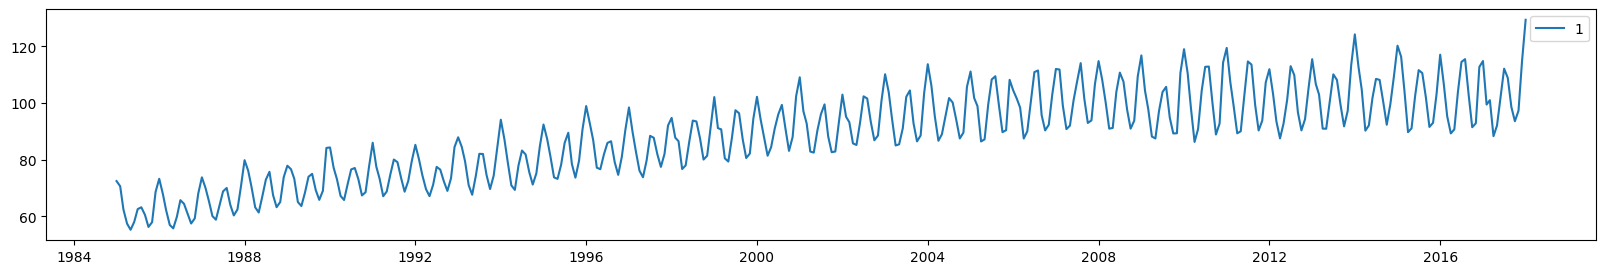

In [13]:
label = 'IPG2211A2N'

In [16]:
# using Time Series Data Frame
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column='id_col',
    timestamp_column="DATE",
)

In [17]:
train_data.head()

In [18]:
plt.figure(figsize=(20, 3))
for item_id in [1]:
    plt.plot(train_data.loc[item_id], label=item_id)
plt.legend()

IPG2211A2N
item_id timestamp             
1       1985-01-01     72.5052
        1985-02-01     70.6720
        1985-03-01     62.4502
        1985-04-01     57.4714
        1985-05-01     55.3151

In [19]:
prediction_length = 15

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'evaluation_metric': 'MAPE',
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'prediction_length': 15,
 'target_column': 'IPG2211A2N',
 'time_limit': 300}
Provided training data set with 377 rows, 1 items. Average time series length is 377.0.
Training artifacts will be saved to: /home/ec2-user/SageMaker/AutogluonModels/ag-20221130_001049
Validation data is None, will hold the last prediction_length 15 time steps out to use as validation set.

Starting training. Start time is 2022-11-30 00:10:49
Models that will be trained: ['AutoETS', 'ARIMA', 'SimpleFeedForward', 'DeepAR', 'Transformer']
Training timeseries model AutoETS. Training for up to 299.98s of the 299.98s of remaining time.
	'pandas._libs.tslibs.offsets.MonthBegin' object has no attribute '_period_dtype_code'
Training timeseries model ARIMA. Training for up to 299.98s of the 299.98s of remaining t

Early stopping based on learning rate scheduler callback (min_lr was reached).


In [20]:
# Split train and test datasets
test_data = train_data.copy()
train_data = train_data.slice_by_timestep(slice(None, -prediction_length))

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.031109,-0.035629,0.020669,0.01708,0.004093,2
1,SimpleFeedForward,-0.032898,-0.037234,0.026285,0.01708,81.963212,1


In [21]:
train_data.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


-0.030214890779690064

In [22]:
# Setting the Time Series Predictor
predictor = ...
# Fit the predictor with train data and time limit of 5min
predictor. ...

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
